# General Data Analysis

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from lapd_codes.crime_codes import crime_codes
from lapd_codes.mo_codes import mo_codes

## Retreive Data From LA City's API

In [2]:
max_rows = 2000000
url = 'https://data.lacity.org/resource/7fvc-faax.csv?$limit=' + str(max_rows)
df = pd.read_csv(url)

In [3]:
print(len(df))

1678869


## Column Titles

In [85]:
list(df)

['area_id',
 'area_name',
 'crm_cd',
 'crm_cd_1',
 'crm_cd_2',
 'crm_cd_3',
 'crm_cd_4',
 'crm_cd_desc',
 'cross_street',
 'date_occ',
 'date_rptd',
 'dr_no',
 'location',
 'location_1',
 'location_1_address',
 'location_1_city',
 'location_1_state',
 'location_1_zip',
 'mocodes',
 'premis_cd',
 'premis_desc',
 'rpt_dist_no',
 'status',
 'status_desc',
 'time_occ',
 'vict_age',
 'vict_descent',
 'vict_sex',
 'weapon_desc',
 'weapon_used_cd']

## Analysis

In [86]:
df['crm_cd_1']

0          740.0
1          888.0
2          330.0
3          330.0
4          745.0
5          510.0
6          888.0
7          210.0
8          740.0
9          901.0
10         626.0
11         442.0
12         624.0
13         439.0
14         442.0
15         210.0
16         330.0
17         330.0
18         440.0
19         745.0
20         745.0
21         740.0
22         330.0
23         350.0
24         668.0
25         745.0
26         354.0
27         930.0
28         510.0
29         740.0
           ...  
1678839    341.0
1678840    310.0
1678841    310.0
1678842    310.0
1678843    440.0
1678844    900.0
1678845    740.0
1678846    901.0
1678847    930.0
1678848    626.0
1678849    420.0
1678850    956.0
1678851    740.0
1678852    330.0
1678853    510.0
1678854    210.0
1678855    310.0
1678856    626.0
1678857    510.0
1678858    933.0
1678859    310.0
1678860    440.0
1678861    510.0
1678862    330.0
1678863    624.0
1678864    341.0
1678865    626.0
1678866    354

In [107]:
df.describe()

,area_id,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,dr_no,location_1_address,location_1_city,location_1_state,location_1_zip,premis_cd,rpt_dist_no,time_occ,vict_age,weapon_used_cd
count,1.678869e+06,1.678869e+06,1.678863e+06,106333.000000,2388.000000,77.000000,1.678869e+06,0.0,0.0,0.0,0.0,1.678767e+06,1.678869e+06,1.678869e+06,1.543733e+06,555918.000000
mean,1.114423e+01,5.068250e+02,5.066986e+02,953.356869,970.369765,969.493506,1.379171e+08,NaN,NaN,NaN,NaN,3.120050e+02,1.160799e+03,1.363545e+03,3.596262e+01,370.610973
std,5.992222e+00,2.104877e+02,2.103987e+02,124.557931,88.837930,92.834973,2.360471e+07,NaN,NaN,NaN,NaN,2.104465e+02,5.992178e+02,6.466978e+02,1.681131e+01,113.956952
min,1.000000e+00,1.100000e+02,1.100000e+02,210.000000,93.000000,421.000000,2.100000e+02,NaN,NaN,NaN,NaN,1.010000e+02,1.000000e+02,1.000000e+00,1.000000e+01,101.000000
25%,6.000000e+00,3.300000e+02,3.300000e+02,998.000000,998.000000,998.000000,1.203131e+08,NaN,NaN,NaN,NaN,1.020000e+02,6.450000e+02,9.300000e+02,2.300000e+01,400.000000
50%,1.200000e+01,4.400000e+02,4.400000e+02,998.000000,998.000000,998.000000,1.406149e+08,NaN,NaN,NaN,NaN,2.100000e+02,1.204000e+03,1.430000e+03,3.400000e+01,400.000000
75%,1.600000e+01,6.260000e+02,6.260000e+02,998.000000,998.000000,998.000000,1.606175e+08,NaN,NaN,NaN,NaN,5.010000e+02,1.676000e+03,1.900000e+03,4.800000e+01,400.000000
max,2.100000e+01,9.560000e+02,9.990000e+02,999.000000,999.000000,999.000000,9.102204e+08,NaN,NaN,NaN,NaN,9.710000e+02,2.198000e+03,2.359000e+03,9.900000e+01,516.000000


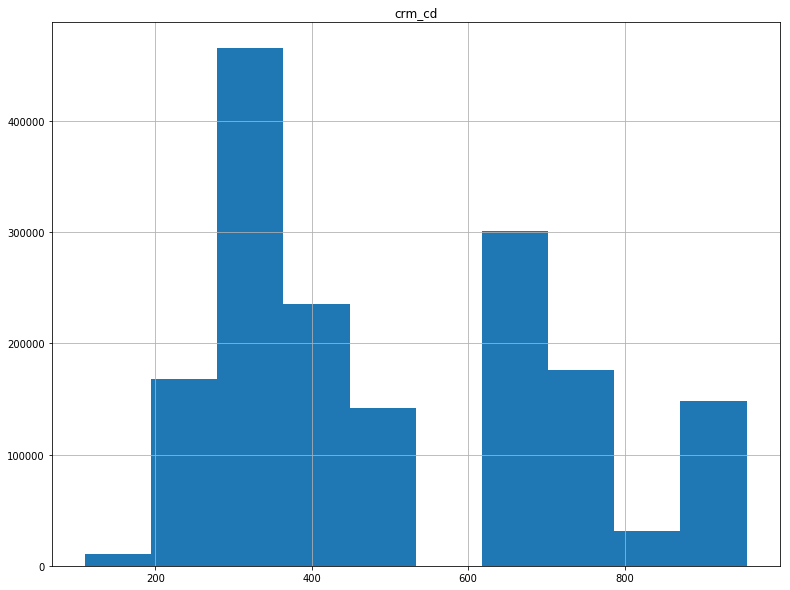

In [87]:
plt.figure();
df.hist(column='crm_cd', figsize=(30,10), layout=(1,2))
plt.show()

In [4]:
crime_dist = {}

def code_to_string(code):
    if str(code) in crime_codes.keys():
        return crime_codes[str(code)]
    else:
        print(str(code))

for crime_code in df['crm_cd']:
    if code_to_string(crime_code) in crime_dist.keys():
        crime_dist[code_to_string(crime_code)] += 1
    else:
        crime_dist[code_to_string(crime_code)] = 1
print(crime_dist)

{'THEFT FROM PERSON - ATTEMPT': 233, 'DISCHARGE FIREARMS/SHOTS FIRED': 2988, 'BATTERY - SIMPLE ASSAULT': 153744, 'INTIMATE PARTNER - SIMPLE ASSAULT': 90850, 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 7200, 'BATTERY ON A FIREFIGHTER': 245, 'BIGAMY': 10, 'RECKLESS DRIVING': 193, 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER': 1780, 'BRANDISH WEAPON': 9895, 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 1332, 'WEAPONS POSSESSION/BOMBING': 140, 'TELEPHONE PROPERTY - DAMAGE': 35, 'CHILD PORNOGRAPHY': 105, 'BRIBERY': 29, 'DISTURBING THE PEACE': 2933, 'BLOCKING DOOR INDUCTION CENTER': 3, 'BUNCO, ATTEMPT': 492, 'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 1, 'PETTY THEFT - AUTO REPAIR': 19, 'INCITING A RIOT': 11, 'TILL TAP - PETTY ($950 & UNDER)': 78, 'BOAT - STOLEN': 236, 'STALKING': 1558, 'TRESPASSING': 15468, 'PURSE SNATCHING - ATTEMPT': 41, 'BUNCO, PETTY THEFT': 3493, 'COUNTERFEIT': 722, 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 189, 'ILLEGAL DUMPING': 411, 'LEWD CONDUCT': 1025

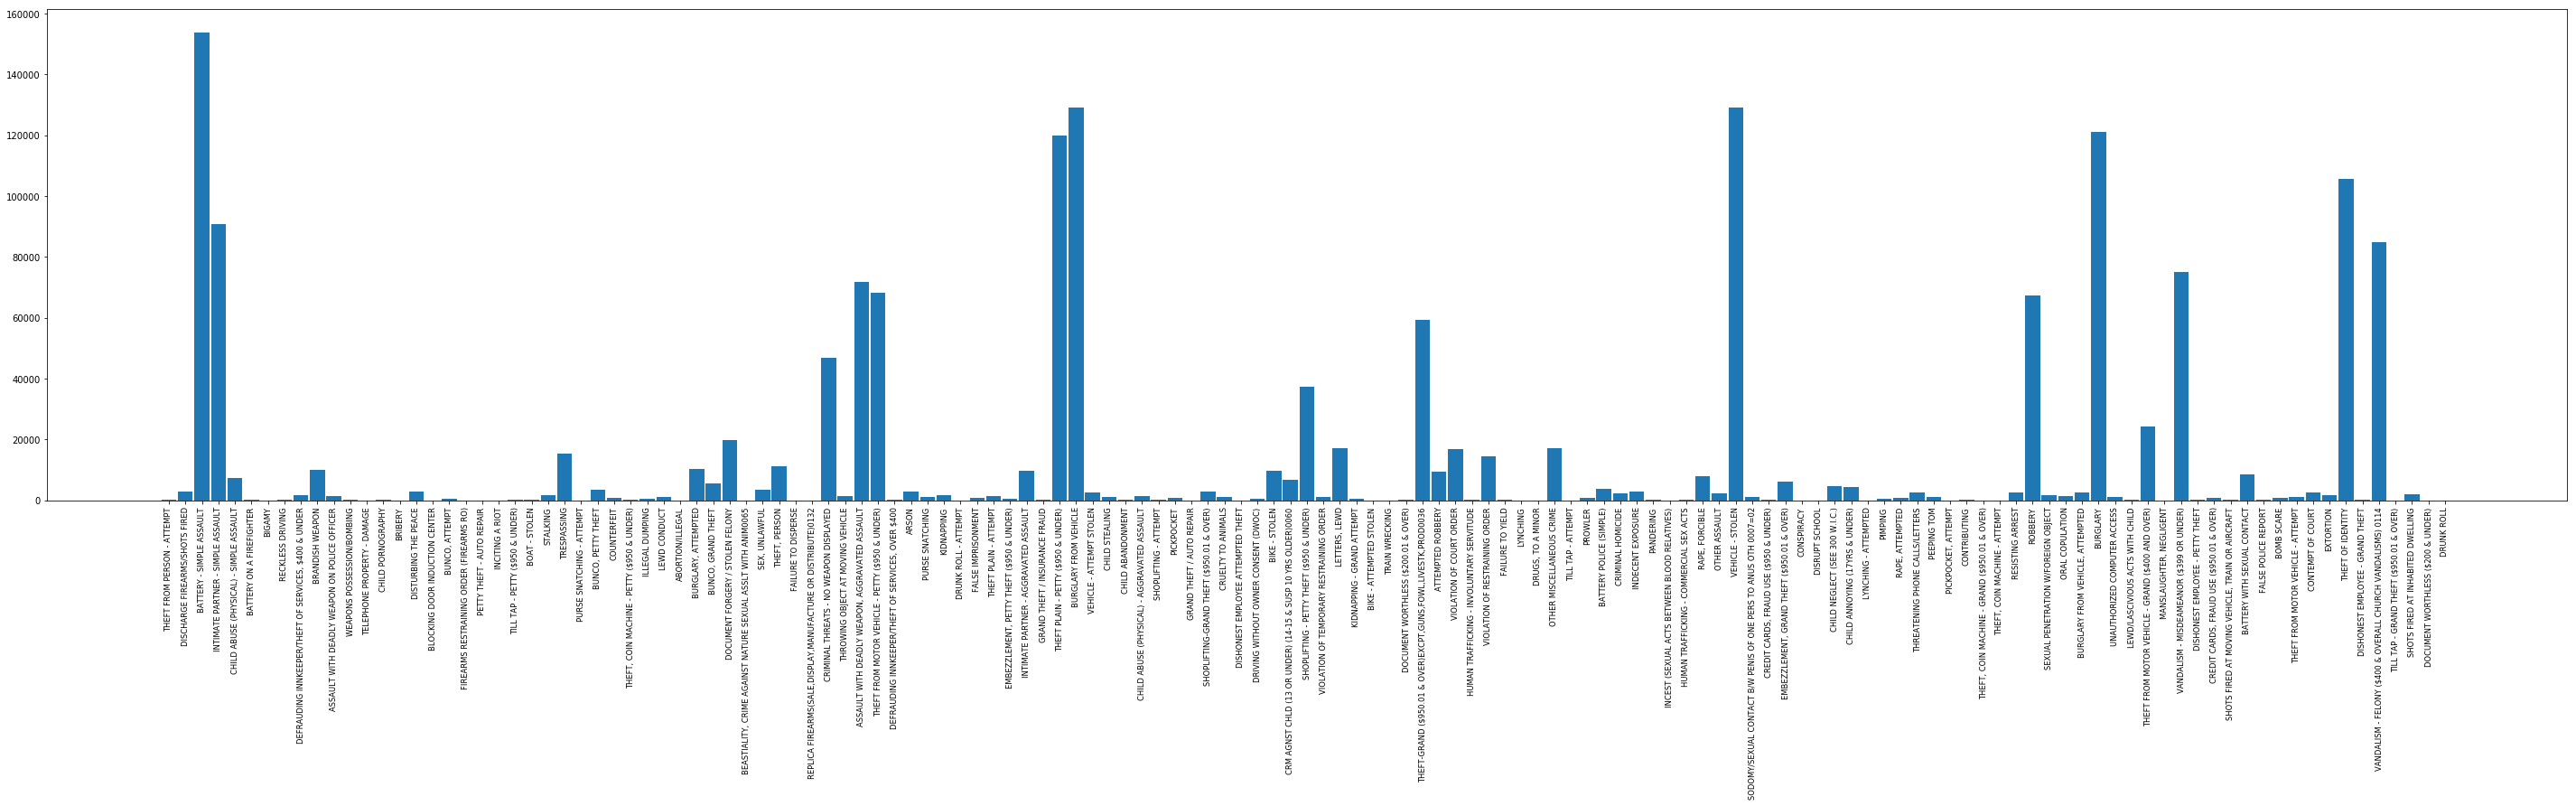

In [19]:
plt.figure(figsize=(50,10))
plt.bar(range(len(crime_dist)), list(crime_dist.values()), align='center', width=0.9)
plt.xticks(range(len(crime_dist)), list(crime_dist.keys()), rotation=90)
plt.tick_params(axis='x', which='major', labelsize='small')
plt.show()

In [20]:
df.loc[df['crm_cd'] == 624]

,area_id,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,...,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd
33,7,Wilshire,624,624.0,NaN,NaN,NaN,BATTERY - SIMPLE ASSAULT,LA BREA,2010-02-12T00:00:00.000,...,STREET,784,AA,Adult Arrest,200,18.0,O,M,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
64,7,Wilshire,624,624.0,NaN,NaN,NaN,BATTERY - SIMPLE ASSAULT,LA BREA AV,2010-04-19T00:00:00.000,...,STREET,705,AO,Adult Other,300,51.0,H,M,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
85,7,Wilshire,624,624.0,NaN,NaN,NaN,BATTERY - SIMPLE ASSAULT,NaN,2010-05-17T00:00:00.000,...,HIGH SCHOOL,702,JA,Juv Arrest,1515,18.0,W,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
86,7,Wilshire,624,624.0,NaN,NaN,NaN,BATTERY - SIMPLE ASSAULT,NaN,2010-05-20T00:00:00.000,...,SINGLE FAMILY DWELLING,784,AA,Adult Arrest,1800,23.0,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
132,7,Wilshire,624,624.0,NaN,NaN,NaN,BATTERY - SIMPLE ASSAULT,NaN,2010-07-18T00:00:00.000,...,SINGLE FAMILY DWELLING,785,AA,Adult Arrest,1310,27.0,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
155,7,Wilshire,624,624.0,998.0,NaN,NaN,BATTERY - SIMPLE ASSAULT,NaN,2010-09-12T00:00:00.000,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",774,AA,Adult Arrest,2050,69.0,B,M,CLUB/BAT,304.0
160,7,Wilshire,624,624.0,NaN,NaN,NaN,BATTERY - SIMPLE ASSAULT,NaN,2010-09-17T00:00:00.000,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",734,AA,Adult Arrest,1345,32.0,W,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
170,7,Wilshire,624,624.0,NaN,NaN,NaN,BATTERY - SIMPLE ASSAULT,MELROSE,2010-11-01T00:00:00.000,...,STREET,702,JA,Juv Arrest,1530,14.0,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
174,7,Wilshire,624,624.0,NaN,NaN,NaN,BATTERY - SIMPLE ASSAULT,NaN,2010-11-17T00:00:00.000,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",784,AA,Adult Arrest,2330,63.0,W,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
198,7,Wilshire,624,624.0,999.0,NaN,NaN,BATTERY - SIMPLE ASSAULT,NaN,2011-09-18T00:00:00.000,...,SINGLE FAMILY DWELLING,734,AO,Adult Other,500,22.0,W,M,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0


In [23]:
battery_simple = df.loc[df['crm_cd'] == 624]

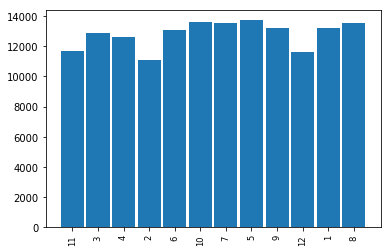

In [46]:
battery_simple_months = {}

for date in battery_simple['date_occ']:
    month = str(datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%f').month)
    
    if month in battery_simple_months.keys():
        battery_simple_months[month] += 1
    else:
        battery_simple_months[month] = 1

plt.bar(range(len(battery_simple_months)), list(battery_simple_months.values()), align='center', width=0.9)
plt.xticks(range(len(battery_simple_months)), list(battery_simple_months.keys()), rotation=90)
plt.tick_params(axis='x', which='major', labelsize='small')
plt.show()

In [28]:
list(range(1,13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]